dataset: http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation
 Nous avons donc un jeu de données QSAR (relation quantitative structure-activité) sur la biodégradabilité 
 de substances chimiques..

In [416]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot
import timeit
%matplotlib inline
!pip install scikit-learn

You should consider upgrading via the 'c:\users\qcall\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


# Data-visualisation

In [417]:
#Importation du dataset
df=pd.read_csv('biodeg.csv', sep=';')
df

,3.919,2.6909,0,0.1,0.2,0.3,0.4,31.4,2,0.5,0.6,0.7,3.106,2.55,9.002,0.8,0.96,1.142,0.9,0.10,0.11,1.201,0.12,0.13,0.14,0.15,1.932,0.011,0.16,0.17,4.489,0.18,0.19,0.20,0.21,2.949,1.591,0.22,7.253,0.23,0.24,RB
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,5.431,2.8955,0,0,0,2,0,32.1,4,1,1,0.374,3.233,0.832,10.681,2,0.982,1.144,0,0,0,1.232,1,0,0,0,2.394,-0.007,0,11.254,1.055,2,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1050,5.287,3.3732,0,0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,11.029,21,1.043,1.140,0,0,0,1.178,1,0,0,0,2.462,0.000,0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1051,4.869,1.7670,0,1,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,11.072,9,1.016,1.123,0,1,0,1.261,3,0,0,0,2.314,0.000,0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1052,5.158,1.6914,2,0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,11.817,0,1.007,1.093,0,0,0,1.410,147,0,1,2,2.622,0.000,0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [418]:
# Ajout des libelés de chaque colonne. (nom de chaque Features)
df.columns =['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC',
            'nCb-', 'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)',
            'LOC', 'SM6_L', 'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2',
            'nCRX3', 'SpPosA_B(p)', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]',
            'N-073', 'SpMax_A', 'Psi_i_1d', 'B04[C-Br]', 'SdO',
            'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)',
            'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX', 'experimental_class'] 

In [419]:
df.dtypes

SpMax_L               float64
J_Dz(e)               float64
nHM                     int64
F01[N-N]                int64
F04[C-N]                int64
NssssC                  int64
nCb-                    int64
C%                    float64
nCp                     int64
nO                      int64
F03[C-N]                int64
SdssC                 float64
HyWi_B(m)             float64
LOC                   float64
SM6_L                 float64
F03[C-O]                int64
Me                    float64
Mi                    float64
nN-N                    int64
nArNO2                  int64
nCRX3                   int64
SpPosA_B(p)           float64
nCIR                    int64
B01[C-Br]               int64
B03[C-Cl]               int64
N-073                   int64
SpMax_A               float64
Psi_i_1d              float64
B04[C-Br]               int64
SdO                   float64
TI2_L                 float64
nCrt                    int64
C-026                   int64
F02[C-N]  

En regardant nos colonnes nous avons un grand nombre de paramètres ainsi qu'une "experimental_class" qui nous indique si la substance chimique est RB ou NRB qui correspond respectivement à Ready Biodegradable ou Not Ready Biodegradable.
Il paraît interessant de rechercher les variables qui vont influer sur cette dernière colonne. 
L'objectif sera de classifier nos subtances chimiques.

In [420]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1054 non-null   float64
 1   J_Dz(e)             1054 non-null   float64
 2   nHM                 1054 non-null   int64  
 3   F01[N-N]            1054 non-null   int64  
 4   F04[C-N]            1054 non-null   int64  
 5   NssssC              1054 non-null   int64  
 6   nCb-                1054 non-null   int64  
 7   C%                  1054 non-null   float64
 8   nCp                 1054 non-null   int64  
 9   nO                  1054 non-null   int64  
 10  F03[C-N]            1054 non-null   int64  
 11  SdssC               1054 non-null   float64
 12  HyWi_B(m)           1054 non-null   float64
 13  LOC                 1054 non-null   float64
 14  SM6_L               1054 non-null   float64
 15  F03[C-O]            1054 non-null   int64  
 16  Me    

On s'aperçoit qu'un data cleaning n'est pas nécessaire pour le moment, aucune valeur nulle dans notre dataset.

In [422]:
df.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,4.783463,3.069867,0.717268,0.042694,0.981025,0.290323,1.648008,37.061006,1.375712,1.805503,1.438330,-0.197316,3.477195,1.349578,9.938269,3.633776,1.013353,1.131096,0.008539,0.074004,0.029412,1.238763,1.407021,0.039848,0.148008,0.031309,2.21591,-0.001217,0.026565,8.788841,2.666617,0.129981,0.884250,1.276091,0.962049,3.919159,2.559335,0.686907,8.630798,0.051233,0.723909
std,0.546527,0.831621,1.462980,0.256129,2.333867,1.074244,2.225299,9.147145,1.964359,1.775407,3.117742,0.770004,0.584316,0.785670,0.928671,4.457954,0.046487,0.030155,0.101850,0.317618,0.218099,0.096504,4.790620,0.195695,0.355276,0.199636,0.22607,0.159003,0.160886,11.898457,2.096851,0.644351,1.520945,2.274734,1.257261,0.999630,0.642378,1.090701,1.241851,0.319118,2.240238
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.00000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.499075,0.000000,0.000000,0.000000,0.000000,0.000000,30.425000,0.000000,0.000000,0.000000,-0.192000,3.105000,0.875000,9.533500,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.10100,-0.008000,0.000000,0.000000,1.444750,0.000000,0.000000,0.000000,0.000000,3.488250,2.104000,0.000000,7.995750,0.000000,0.000000
50%,4.828000,3.046550,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.443000,1.187000,10.040500,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.24700,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.727000,2.458500,0.000000,8.500500,0.000000,0.000000
75%,5.125000,3.438725,1.000000,0.000000,1.000000,0.000000,3.000000,43.450000,2.000000,3.000000,2.000000,0.000000,3.825750,1.704250,10.515250,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.35800,0.005000,0.000000,12.479500,3.141000,0.000000,1.000000,2.000000,2.000000,3.987500,2.870750,1.000000,9.022250,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.85900,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


Commençons par rechercher les variables qui ont une influence sur notre colonne "experimental_class"

In [423]:
nbValeur = df.experimental_class.count()
nbValeur

1054

In [424]:
df.experimental_class.value_counts()/nbValeur

NRB    0.663188
RB     0.336812
Name: experimental_class, dtype: float64

On peut voir que la proportion de valeurs "Not Ready Biodegradable" est bien plus importante que les "Ready Biodegradable"

Nous allons diviser notre dataset en deux; en fonction des valeurs de la classe experimental, ce qui permettra d'étudier chaque variable de façon à voir la différence pour nos différents jeux de données.

In [425]:
#Après avoir réalisé dans un premier temps l'exercice je me suis rendu compte que certaines variables étaient
#fortement similaires (corrélées entre elles) il parait donc interessant de les retirer pour améliorer la fiabilité
#de notre étude
abs(df.corr()).style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
SpMax_L,1.0,0.23,0.26,0.022,0.19,0.45,0.42,0.38,0.2,0.26,0.18,0.1,0.64,0.11,0.91,0.41,0.28,0.12,0.11,0.11,0.23,0.23,0.17,0.011,0.14,0.054,0.92,0.011,0.036,0.26,0.034,0.23,0.31,0.14,0.032,0.3,0.099,0.056,0.49,0.087,0.34
J_Dz(e),0.23,1.0,0.067,0.094,0.19,0.35,0.26,0.3,0.15,0.19,0.14,0.19,0.043,0.31,0.11,0.12,0.49,0.44,0.034,0.13,0.32,0.26,0.22,0.0056,0.0062,0.14,0.02,0.0012,0.041,0.11,0.042,0.2,0.11,0.18,0.0093,0.085,0.51,0.089,0.087,0.072,0.39
nHM,0.26,0.067,1.0,0.022,0.0032,0.068,0.26,0.098,0.12,0.11,0.017,0.06,0.48,0.095,0.22,0.047,0.37,0.32,0.0029,0.043,0.15,0.51,0.086,0.32,0.54,0.051,0.22,0.0047,0.29,0.076,0.06,0.2,0.44,0.037,0.14,0.46,0.051,0.043,0.57,0.044,0.54
F01[N-N],0.022,0.094,0.022,1.0,0.45,0.0067,0.19,0.039,0.025,0.033,0.42,0.052,0.087,0.068,0.077,0.0079,0.026,0.071,0.39,0.019,0.023,0.0083,0.041,0.034,0.11,0.31,0.051,0.0037,0.028,0.12,0.073,0.034,0.21,0.5,0.13,0.0058,0.023,0.46,0.04,0.015,0.0007
F04[C-N],0.19,0.19,0.0032,0.45,1.0,0.0018,0.37,0.15,0.0076,0.086,0.87,0.091,0.28,0.1,0.3,0.09,0.0048,0.036,0.033,0.21,0.012,0.085,0.52,0.065,0.1,0.38,0.27,0.0015,0.044,0.28,0.091,0.036,0.33,0.79,0.21,0.041,0.031,0.75,0.15,0.043,0.021
NssssC,0.45,0.35,0.068,0.0067,0.0018,1.0,0.079,0.062,0.45,0.043,0.02,0.16,0.27,0.0046,0.4,0.13,0.39,0.49,0.023,0.041,0.49,0.21,0.03,0.014,0.013,0.007,0.34,0.0038,0.028,0.024,0.047,0.22,0.031,0.038,0.017,0.015,0.3,0.077,0.12,0.038,0.68
nCb-,0.42,0.26,0.26,0.19,0.37,0.079,1.0,0.6,0.14,0.12,0.33,0.097,0.52,0.31,0.51,0.28,0.061,0.45,0.029,0.18,0.051,0.43,0.27,0.089,0.28,0.18,0.51,0.0068,0.17,0.2,0.014,0.12,0.8,0.33,0.11,0.22,0.077,0.18,0.4,0.11,0.13
C%,0.38,0.3,0.098,0.039,0.15,0.062,0.6,1.0,0.23,0.15,0.11,0.026,0.35,0.38,0.43,0.059,0.091,0.68,0.14,0.041,0.086,0.62,0.26,0.036,0.25,0.14,0.57,0.018,0.14,0.028,0.13,0.05,0.41,0.095,0.24,0.15,0.25,0.092,0.28,0.12,0.046
nCp,0.2,0.15,0.12,0.025,0.0076,0.45,0.14,0.23,1.0,0.19,0.015,0.043,0.18,0.26,0.25,0.32,0.22,0.17,0.059,0.077,0.05,0.13,0.059,0.034,0.14,0.023,0.09,0.002,0.068,0.0098,0.21,0.012,0.076,0.031,0.013,0.018,0.18,0.11,0.032,0.022,0.046
nO,0.26,0.19,0.11,0.033,0.086,0.043,0.12,0.15,0.19,1.0,0.093,0.5,0.33,0.33,0.36,0.84,0.22,0.089,0.054,0.24,0.078,0.37,0.023,0.098,0.13,0.098,0.23,0.0079,0.085,0.75,0.35,0.029,0.1,0.058,0.2,0.034,0.34,0.025,0.11,0.22,0.12


Nous prendrons donc une valeur arbitraire de >= 0.90 pour estimer que deux variables sont fortement corrélées.
On peut distinguer que:
SpMax_L fortement corrélée à SpMax_A et SM6_L
Nous supprimerons donc ces valeurs de notre df pour plus de précision par la suite.

In [426]:
#Cette méthode ne ressortant pas les couleurs sur github il parait interessant de supprimer toutes les valeurs infèrieurs à 0.90 pour plus
#de lisibilité en les remplaçant par des '.'
df.corr().applymap(lambda value: value if abs(value)>.90 else '.')

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
SpMax_L,1,.,.,.,.,.,.,.,.,.,.,.,.,.,0.911555,.,.,.,.,.,.,.,.,.,.,.,0.918821,.,.,.,.,.,.,.,.,.,.,.,.,.,.
J_Dz(e),.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
nHM,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
F01[N-N],.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
F04[C-N],.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
NssssC,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
nCb-,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
C%,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
nCp,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
nO,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [427]:
#Division de notre dataset en deux parties en fonction de leur experimental_class
dfBio = df.loc[df["experimental_class"] == 'RB']
dfNBio= df.loc[df["experimental_class"] == 'NRB']

In [428]:
dfBio

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,4.236,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,5.072,2.5240,0,0,0,0,2,36.4,2,4,0,-0.888,4.154,3.020,10.632,12,0.986,1.132,0,0,0,1.212,1,0,0,0,2.351,0.000,0,24.704,6.968,0,0,0,0,3.794,2.167,0,8.904,2,0,RB
904,5.089,1.8308,0,0,0,0,2,40.0,0,4,0,-0.809,4.049,0.490,10.803,14,0.996,1.125,0,0,0,1.213,3,0,0,0,2.373,0.000,0,25.001,4.390,0,0,0,0,3.800,2.222,0,8.910,2,0,RB
905,4.910,2.8789,0,0,0,0,3,52.6,0,1,0,0.000,3.357,0.629,10.060,2,0.993,1.098,0,0,0,1.319,3,0,0,0,2.333,0.004,0,0.000,1.207,0,1,0,1,3.860,2.273,0,8.487,0,0,RB
906,4.000,3.1669,0,0,0,0,0,45.5,0,0,1,0.000,2.737,0.000,8.623,0,0.988,1.121,0,0,0,1.287,1,0,0,0,2.000,0.137,0,0.000,0.667,0,0,2,0,3.482,2.167,1,7.627,0,0,RB


In [429]:
dfNBio

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
283,4.825,3.1934,3,0,0,0,3,46.7,1,0,0,0.000,3.642,1.185,9.902,0,1.034,1.100,0,0,0,1.359,1,0,1,0,2.263,0.014,0,0.000,1.476,0,2,0,0,4.054,2.483,0,9.085,0,3,NRB
284,4.562,1.8929,0,0,6,0,0,35.1,0,0,6,0.000,3.526,0.000,10.054,0,0.974,1.139,0,0,0,1.209,2,0,0,0,2.194,0.000,0,0.000,4.130,0,0,4,0,3.489,1.744,2,8.179,0,0,NRB
285,4.982,2.3934,0,0,0,0,0,42.1,0,3,0,-0.686,3.339,0.762,10.226,8,1.027,1.120,0,0,0,1.204,3,0,0,0,2.424,0.004,0,21.884,1.027,2,0,0,0,3.693,2.773,0,8.297,0,0,NRB
286,6.316,7.7233,0,0,0,11,0,31.6,1,2,0,-4.617,4.645,1.747,12.353,2,1.291,1.348,0,0,1,0.906,0,0,0,0,2.690,0.000,0,9.855,5.094,0,0,0,1,3.993,5.741,0,9.673,0,23,NRB
287,6.330,7.9184,0,0,0,13,0,31.8,1,2,0,-4.724,4.795,1.824,12.519,2,1.292,1.350,0,0,1,0.906,0,0,0,0,2.700,0.000,0,9.894,5.891,0,0,0,1,4.005,5.742,0,9.825,0,27,NRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,5.431,2.8955,0,0,0,2,0,32.1,4,1,1,0.374,3.233,0.832,10.681,2,0.982,1.144,0,0,0,1.232,1,0,0,0,2.394,-0.007,0,11.254,1.055,2,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1050,5.287,3.3732,0,0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,11.029,21,1.043,1.140,0,0,0,1.178,1,0,0,0,2.462,0.000,0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1051,4.869,1.7670,0,1,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,11.072,9,1.016,1.123,0,1,0,1.261,3,0,0,0,2.314,0.000,0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1052,5.158,1.6914,2,0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,11.817,0,1.007,1.093,0,0,0,1.410,147,0,1,2,2.622,0.000,0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [430]:
#https://seaborn.pydata.org/introduction.html
#https://www.youtube.com/watch?v=mJ9KajSVG0Q
import seaborn as sns
import matplotlib.pyplot as plt

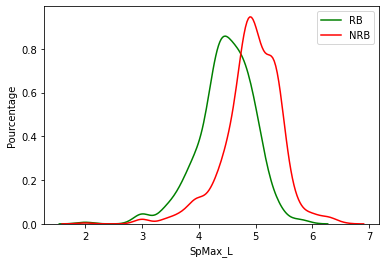

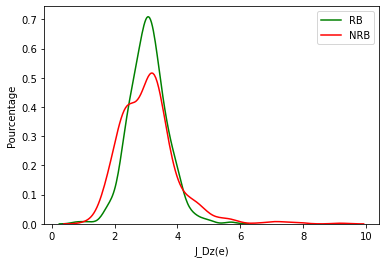

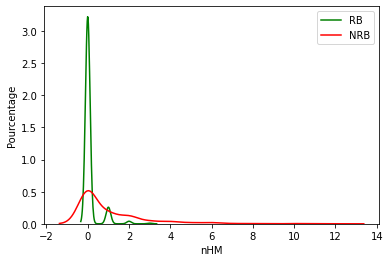

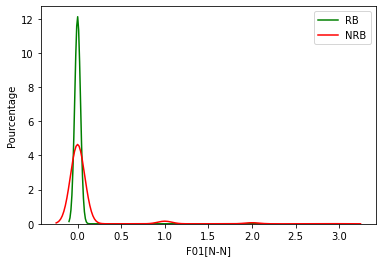

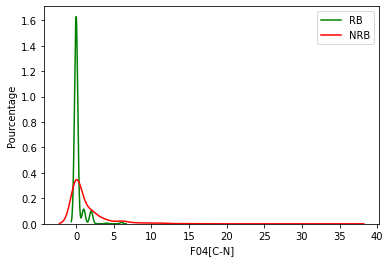

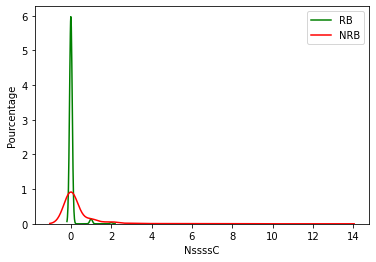

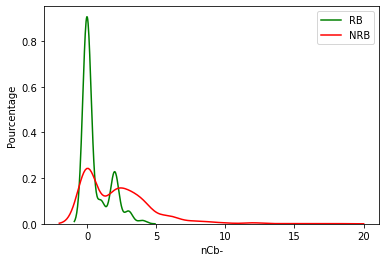

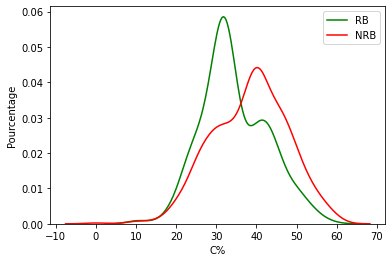

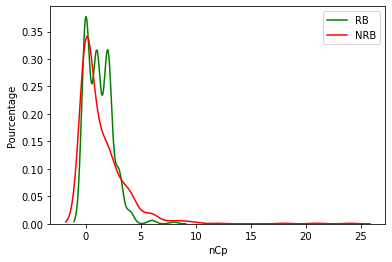

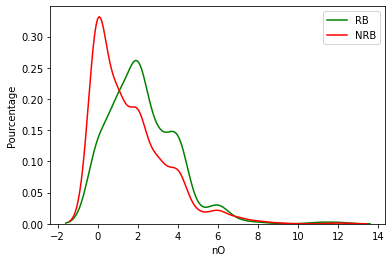

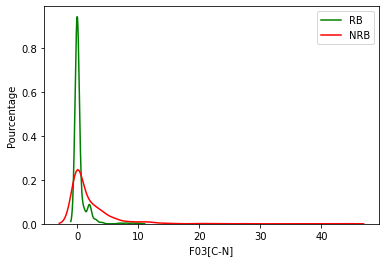

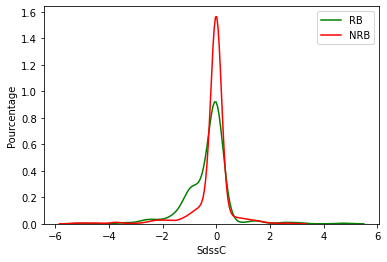

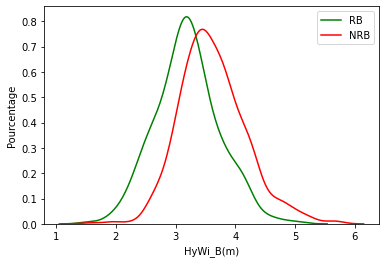

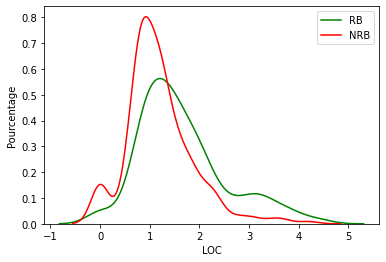

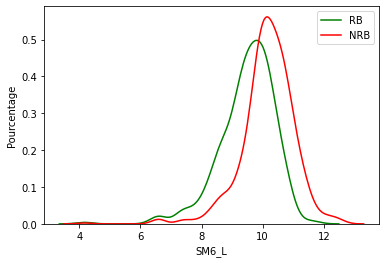

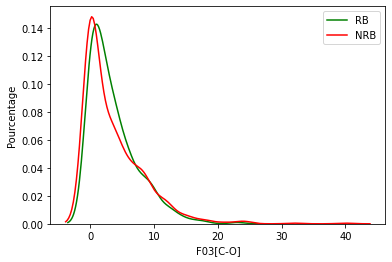

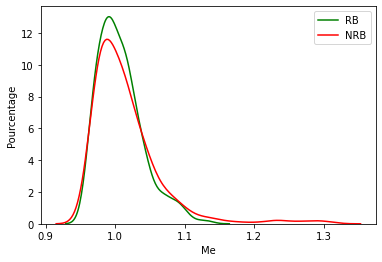

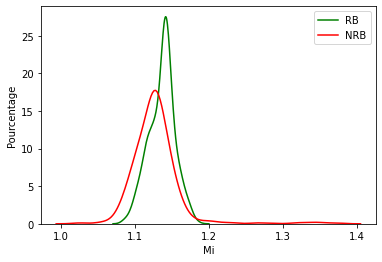

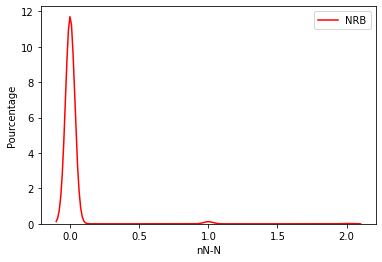

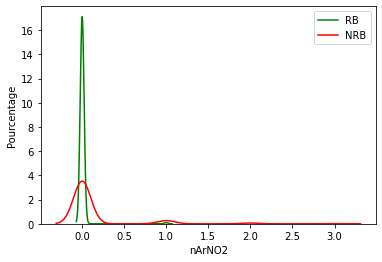

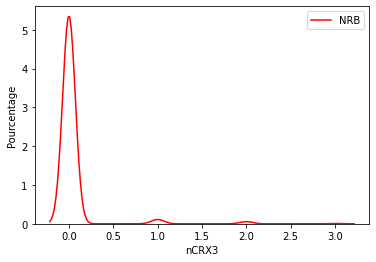

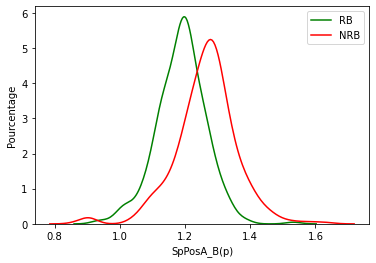

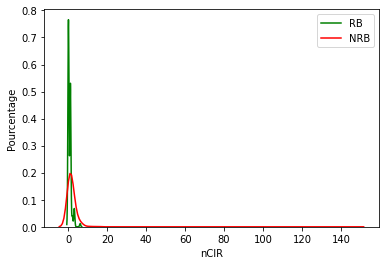

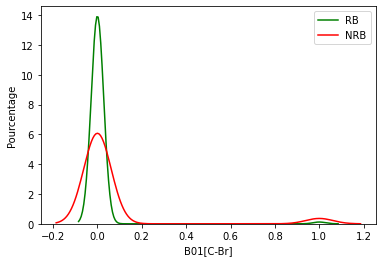

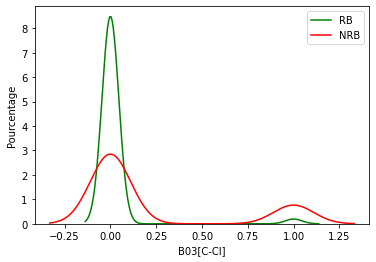

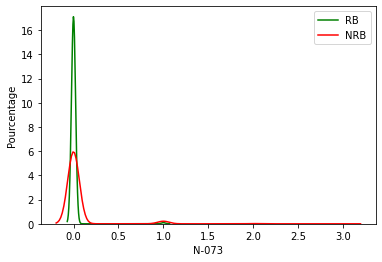

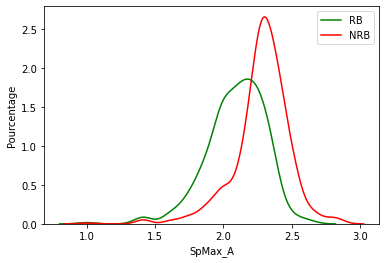

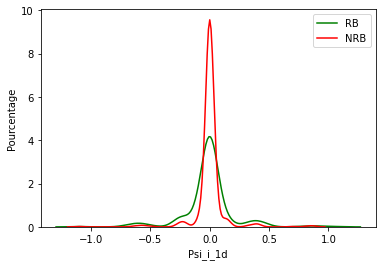

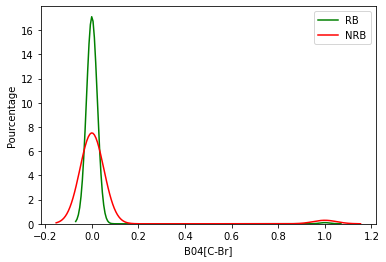

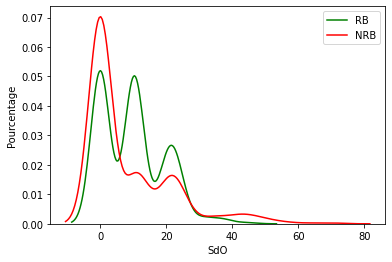

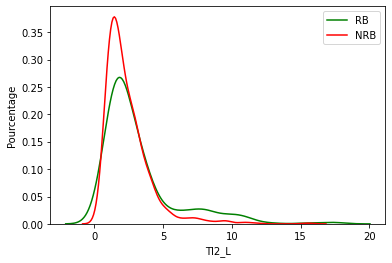

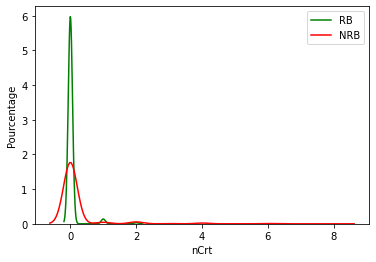

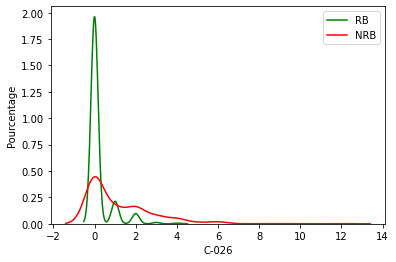

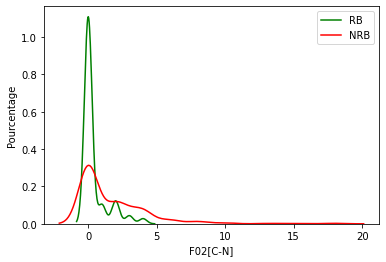

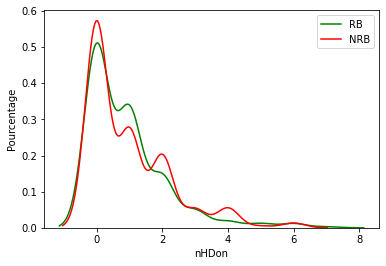

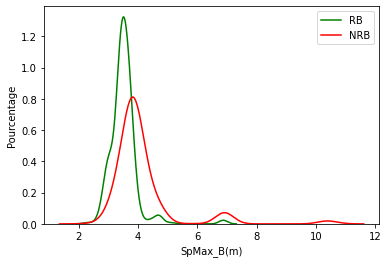

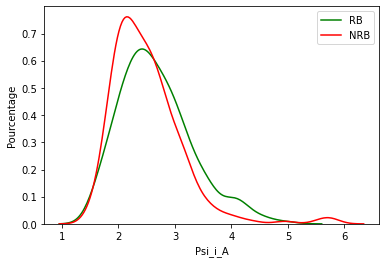

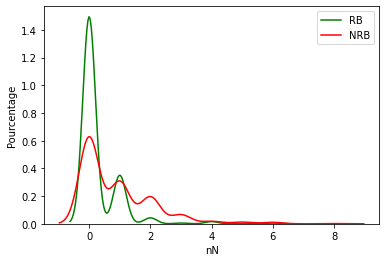

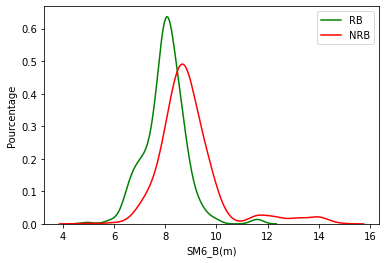

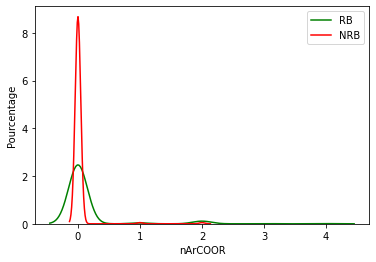

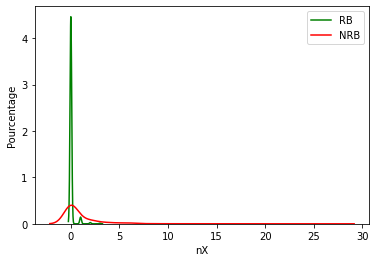

In [431]:
for nameColumn in df.columns[:-1]:
    sns.kdeplot(dfBio[nameColumn] ,label = "RB", color = "g")
    sns.kdeplot(dfNBio[nameColumn], label = "NRB", color = "r" )
    plt.ylabel("Pourcentage")
    plt.legend()
    plt.show()

Cela nous permet d'observer que ces variables ont une influence sur le fait que la variable soit RB ou NRB.
     
    _SpMax_L
    _C%
    _nO
    _HyWi_B(m)
    _SM6_L
    _SpPosA_B(p),
    _SpMax_A
    _SpMax_B(m)
    _SM6_B(m)
    Cependant certaines variables ne contiennent qu'une faible différence.
    De plus, comme vu auparavant, certaines variables sont fortement corrélées. 
    Nous allons donc les retirer de notre df.    

----------------------------------------------------------------------------------------------------------------------------
# Resultat de notre Data-visulation: 
  
### _C%
### _nO
### _HyWi_B(m)
### _SpPosA_B(p)
### _SpMax_B(m)
### _SM6_B(m)
sont des variables qui ont une influence sur le fait que la molécule soit classée comme dégradable ou non.

----------------------------------------------------------------------------------------------------------------------------

In [432]:
df = df.drop(['SpMax_L', 'SpMax_A', 'SM6_L'], axis=1)
df

,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,1,0.989,1.144,0,0,0,1.104,1,0,0,0,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
1,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,0,1.009,1.152,0,0,0,1.092,0,0,0,0,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
2,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
3,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,2,1.004,1.147,0,0,0,1.137,0,0,0,0,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
4,3.4286,0,0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,1,1.014,1.149,0,0,0,1.119,0,0,0,0,-0.008,0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2.8955,0,0,0,2,0,32.1,4,1,1,0.374,3.233,0.832,2,0.982,1.144,0,0,0,1.232,1,0,0,0,-0.007,0,11.254,1.055,2,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1050,3.3732,0,0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,21,1.043,1.140,0,0,0,1.178,1,0,0,0,0.000,0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1051,1.7670,0,1,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,9,1.016,1.123,0,1,0,1.261,3,0,0,0,0.000,0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1052,1.6914,2,0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,0,1.007,1.093,0,0,0,1.410,147,0,1,2,0.000,0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1,NRB


# Modélisation



----------------------------------------------------------------------------------------------------------------------------
  
### Il serait interessant maintenant de réaliser un modèle à l'aide de scikit learn comme vu en cours.
https://scikit-learn.org/stable/
#### documentation utile: https://youtu.be/P6kSc3qVph0
Nous allons donc diviser notre dataset de façon à avoir un jeu de données de test et un jeu de données permettant l'entraînement de notre modèle.         
Le jeu de données de test permettra lui de valider notre modèle.

----------------------------------------------------------------------------------------------------------------------------
Nous allons ensuite diviser notre dataframe en 4 parties.
  
    -X_test
    -Y_test
    -X_train
    -Y_train
X correspondant à toutes nos valeurs sauf la classe experimentale.
Y correspondant à nos valeurs targets
un groupe de Test comme cité plus haut.
un groupe d'entrainement comme cité plus haut.

In [433]:
#Pour permettre de faciliter notre étude sur les modèles nous allons commencer par modifier notre classe experimentale
#En modifiant les valeurs RB et NRB par des 1 et 0 respectivement.
#Dans un but d'obtenir des valeurs numériques car il sera impossible de faire du machine learning avec des objets.
df['experimental_class'].replace(['RB','NRB'], [1,0], inplace=True)


In [434]:
df['experimental_class']

0       1
1       1
2       1
3       1
4       1
       ..
1049    0
1050    0
1051    0
1052    0
1053    0
Name: experimental_class, Length: 1054, dtype: int64

In [435]:
Y = df.experimental_class
X = df.drop("experimental_class", axis = 1)

Il est maintenant important de diviser notre DF en deux parties, une de test et une de training.
On utilisera une fonction déjà implementée dans Scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [436]:
import sklearn
from sklearn.model_selection import train_test_split

In [437]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
#pas de paramètre pour gérer l'aléatoire. (random_state)
#le paramètre test_size nous permet de diviser le dataset en mettant 20% (0.2) pour la partie test et 80% pour la partie entrainement

In [438]:
X_train.shape, X_test.shape

((843, 38), (211, 38))

In [439]:
Y_train.shape, Y_test.shape

((843,), (211,))

Notre dataframe est maintenant divisé en 4.
Il parait interessant d'utiliser plusieurs méthodes vues en cours.
Pour faciliter les termes employés par la suite nous clarifirons plusieurs termes:
  
  _les features sont les variables dans X, les targets ou labels sont la variable dans Y
 
On prendra soin pour pouvoir utiliser des models sklearn que notre label/target ne contiendra bien qu'une seule colonne comme on peut le confirmer pour notre cas

## Préprocessing

##### Après avoir reallisé une première fois l'exercice sans préprocessing la diférence est notable.
##### Sans préprocessing l'algorithme du random forest est bien plus performante pour mon dataset.
##### Cependant, comme vous pourrez le constater par la suite après préprocessing la méthode des Knn devient plus éfficace. 
##### Cela vient du fait que la standardisation est particulièrement importante pour les algorithme prenant en compte la distance.

In [440]:
#Documentation utile: https://mrmint.fr/data-preprocessing-feature-scaling-python
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#https://scikit-learn.org/stable/modules/preprocessing.html
#Il est important de préprocessé ses données dans un but d'obtenir la meilleure précision possible
#Nous allons standardiser nos variables
#Pour cela nous procéderons en deux parties. Pour les variables polynomiales et les variables linéaires
from sklearn.preprocessing import StandardScaler

In [441]:
from sklearn.preprocessing import PolynomialFeatures

In [442]:
# Pour les variables polynomiales nous allons étudier les interactions entre les polynomes en commençant par un polynome de degré 2.
poly = PolynomialFeatures(2)
poly.fit(X_train)
#Generations des termes polynomiaux
X_train_polynomials = (pd.DataFrame(poly.transform(X_train),columns = poly.get_feature_names(X_train.columns)))
X_test_polynomials = (pd.DataFrame(poly.transform(X_test),columns = poly.get_feature_names(X_train.columns)))

In [443]:
#Nous allons maintenant les scale pour obtenir de meilleurs performances pour la suite de notre projet.
scaler_poly = StandardScaler()
scaler_poly.fit(X_train_poly)
X_train_polynomials = pd.DataFrame(scaler_poly.transform(X_train_polynomials),columns = X_train_polynomials.columns)
X_test_polynomials = pd.DataFrame(scaler_poly.transform(X_test_polynomials),columns = X_train_polynomials.columns)
X_train_polynomials

1  J_Dz(e)           nHM      F01[N-N]      F04[C-N]        NssssC  \
0    0.0   4.5744  4.016821e-17  6.038402e-17  5.024113e-16  6.848351e-17   
1    0.0   2.7098  4.016821e-17  6.038402e-17  5.024113e-16  6.848351e-17   
2    0.0   3.4023  4.016821e-17  6.038402e-17  5.024113e-16  6.848351e-17   
3    0.0   3.3208  4.016821e-17  6.038402e-17  5.024113e-16  2.000000e+00   
4    0.0   2.9595  1.000000e+00  6.038402e-17  5.024113e-16  6.848351e-17   
..   ...      ...           ...           ...           ...           ...   
838  0.0   3.3311  4.016821e-17  6.038402e-17  5.024113e-16  2.000000e+00   
839  0.0   3.2319  4.016821e-17  6.038402e-17  2.000000e+00  6.848351e-17   
840  0.0   2.3717  4.016821e-17  6.038402e-17  5.024113e-16  6.848351e-17   
841  0.0   2.4237  2.000000e+00  6.038402e-17  5.024113e-16  6.848351e-17   
842  0.0   4.1448  4.000000e+00  6.038402e-17  2.000000e+00  6.848351e-17   

             nCb-    C%           nCp            nO      F03[C-N]  \
0    9.100405e-17  27.3 -2.730121e-16  6.000000e+00  3.251979e-16   
1    9.100405e-17  20.0 -2.730121e-16  2.000000e+00  3.251979e-16   
2    3.000000e+00  40.9 -2.730121e-16  3.000000e+00  3.251979e-16   
3    3.000000e+00  37.2  6.000000e+00  1.000000e+00  3.251979e-16   
4    3.000000e+00  55.6 -2.730121e-16  1.011449e-16  3.251979e-16   
..            ...   ...           ...           ...           ...   
838  3.000000e+00  37.8  6.000000e+00  1.000000e+00  3.251979e-16   
839  2.000000e+00  37.9  2.000000e+00  2.000000e+00  1.000000e+00   
840  9.100405e-17  29.4  1.000000e+00  2.000000e+00  3.251979e-16   
841  4.000000e+00  54.5 -2.730121e-16  1.011449e-16  3.251979e-16   
842  9.100405e-17  25.0 -2.730121e-16  1.011449e-16  3.251979e-16   

            SdssC  HyWi_B(m)    LOC      F03[C-O]     Me     Mi          nN-N  \
0   -3.785000e+00      3.490  1.776  3.555874e-17  1.073  1.155  1.836214e-16   
1    4.188030e-17      2.100  0.918  3.555874e-17  1.108  1.167  1.836214e-16   
2    4.188030e-17      3.404  1.299  6.000000e+00  1.018  1.123  1.836214e-16   
3    4.188030e-17      3.660  1.494  3.000000e+00  0.972  1.130  1.836214e-16   
4    4.188030e-17      3.496  0.629  3.555874e-17  0.992  1.089  1.836214e-16   
..            ...        ...    ...           ...    ...    ...           ...   
838  4.188030e-17      3.551  1.161  3.000000e+00  0.974  1.129  1.836214e-16   
839 -4.320000e-01      3.525  1.733  6.000000e+00  0.998  1.132  1.836214e-16   
840  4.188030e-17      2.789  1.203  1.000000e+00  1.004  1.147  1.836214e-16   
841  4.188030e-17      4.426  0.673  3.555874e-17  0.994  1.080  1.836214e-16   
842  1.674000e+00      3.751  1.792  3.555874e-17  0.997  1.115  1.836214e-16   

           nArNO2         nCRX3  SpPosA_B(p)          nCIR     B01[C-Br]  \
0    1.112857e-16 -3.761654e-16        1.099  1.251306e-16  3.509121e-16   
1    1.112857e-16 -3.761654e-16        1.024  1.251306e-16  3.509121e-16   
2    1.112857e-16 -3.761654e-16        1.219  1.000000e+00  3.509121e-16   
3    1.112857e-16 -3.761654e-16        1.245  1.000000e+00  3.509121e-16   
4    1.112857e-16 -3.761654e-16        1.369  3.000000e+00  3.509121e-16   
..            ...           ...          ...           ...           ...   
838  1.112857e-16 -3.761654e-16        1.265  1.000000e+00  3.509121e-16   
839  1.112857e-16 -3.761654e-16        1.222  1.000000e+00  3.509121e-16   
840  1.112857e-16 -3.761654e-16        1.141  1.000000e+00  3.509121e-16   
841  1.112857e-16 -3.761654e-16        1.425  2.000000e+00  1.000000e+00   
842  1.112857e-16 -3.761654e-16        1.399  1.251306e-16  3.509121e-16   

        B03[C-Cl]         N-073      Psi_i_1d     B04[C-Br]           SdO  \
0   -3.964142e-17 -1.866834e-16  5.000000e-03  3.258235e-16  3.043600e+01   
1   -3.964142e-17 -1.866834e-16  1.073000e+00  3.258235e-16  8.361000e+00   
2   -3.964142e-17 -1.866834e-16  4.000000e-03  3.258235e-16  1.037800e+01   
3   -3.964142e-17 -1.866834e-16 -1.288017e-16  3.258235e-16

In [444]:
#Même procedé pour le reste des variables (les variables linéaires)
scaler_lin = StandardScaler()
scaler_lin.fit(X_train)
X_train = pd.DataFrame(scaler_lin.transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler_lin.transform(X_test),columns = X_train.columns)

In [445]:
#méthode du notebook: esilv_TP5_scikit_learn_part_1_base_internatues employée en classe
def draw_confusion_matrix(y_test, predictions, title):
    """
    Créé et affiche la matrice de confusion des données de Y_test et de celles sur lesquelles on a fait la prédiction.
    Permet d'évaluer la qualité de la classification souhaitée.
    Plus les valeurs diagonales sont élevées, plus le classifieur prédit correctement.
    """
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

# Methode des Kneighbors
## Méthode naïve (pour exemple)

In [446]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier()

In [447]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [448]:
model.score(X_test, Y_test)
#La précision de notre modèle est donc d'environ 82% sans hyperparamètre

0.8246445497630331

In [449]:
#Ajustons notre hyperparamètre manuellement de façon à obtenir la meilleure précision possible
model2 = KNeighborsClassifier(n_neighbors=6)

In [450]:
model2.fit(X_train, Y_train)
model2.score(X_test, Y_test)
#En testant différents hyperparamètres on obtient que lorsque l'on met 6 au nombre de proches voisins on obtient presque 83% de précision

0.8388625592417062

In [451]:
predictions = model2.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [452]:
pd.crosstab(predictions, Y_test)
#On obtient une matrice de confusion nous montrant également la justesse de notre modèle.

experimental_class,0,1
row_0,,
0,124,19
1,15,53


In [453]:
from sklearn.metrics import confusion_matrix
confusion_matrix(model2.predict(X_test), Y_test)

array([[124,  19],
       [ 15,  53]], dtype=int64)

Cependant, cette méthode n'est pas viable.
En effet, nous avons amelioré la fiabilité de notre modèle en modifiant les hyperparamètre de notre dataset de Test.
de ce fait, c'est comme si nous avions fait voir nos données de test à notre modèle.
Pour faire simple, nous ne savons pas si avec d'autres valeurs encore inconnues de notre modèle nous obtiendrons les mêmes résutats de précision.
Nous allons donc rajouter un dataset de validation.
Il reste un point non négligeable.
Le fait d'entrainer et de tester avec une certaine partie d'un jeu de données pourrait être plus optimisé avec un algorithme par rapport à un autre. Pour remédier à cela nous allons mettre une place une cross validation.

In [454]:
from sklearn.model_selection import cross_val_score

In [455]:
cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=5, scoring='accuracy')

array([0.83431953, 0.84023669, 0.82840237, 0.85119048, 0.89285714])

In [456]:
cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=5, scoring='accuracy').mean()

0.8494012397858552

Pour expliquer les dernières ligne il faut comprendre que nous utilisons la cross_validation
Nous avons donc donné en paramètre la méthode de classification, notre dataset X d'entrainement et Y d'entrainement puis le nombre de "découpe" que nous voulons appliquer à notre dataset.
Nous avons également ajouté la metrics qui est accuracy (inutile dans notre cas car méthode de base pour ce classifieur)
nous allons ensuite calculer la precision pour chaque partie du dataset et en faire la moyenne pour obtenir la précision moyenne sur l'integralité de notre dataset

In [457]:
#Faisons maintenant varier notre hyperparamètre de façon à trouver celui qui sera le meilleur pour tous les jeux de données.
cross_val_score(KNeighborsClassifier(4), X_train, Y_train, cv=5, scoring='accuracy').mean()

0.8505846717385179

On obtient alors une précision de 0.85% pour un hyperparamètre du nombre de plus proches voisins égale à 4.
(recherche manuelle)

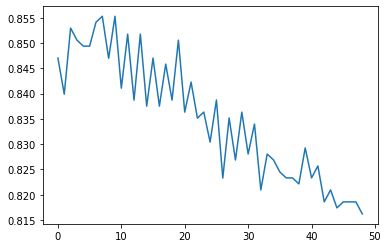

In [458]:
#fonction de validation
val_score=[]
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, Y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

#### Cette méthode étant très fastidieuse il existe d'autres méthodes permettant de trouver plus rapidement et facilement les meilleurs hyperparamètres pour une méthode de classification.
##### Toute cette partie était à but d'exemple.
##### Pour compléter notre étude nous utiliserons la méthode des GridSearch

# Méthode des Kneighbors
## Avec GridSearch

In [459]:
#Essayons maintenant de trouver un model qui se verrait plus performant
#grâce à la gridsearch nous allons trouver les meilleurs hyperparamètres en comparant les performances
# de chaque combinaisons grâce à la cross_validation
from sklearn.model_selection import GridSearchCV

In [460]:
#La gridSearch nous permet de définir l'ensemble des hyperparamètre à faire varier.
#Il produira alors l'ensemble des calculs et nous apportera la liste des hyperparamètres permettant
#d'obtenir la meilleurep précision possible.
#exemple de grille de paramètre:
param_grid = {  "n_neighbors"    : [2, 3, 4, 5, 6, 7, 8 ,9, 10]                   , 
                    "weights"         : ['uniform', 'distance']                  ,
                    "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] , 
                    "leaf_size"      : [1,3 ]                                    }
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [461]:
start_time = timeit.default_timer()
grid.fit(X_train, Y_train)
elapsed = timeit.default_timer() - start_time
print("temps pour effectuer l'entrainement: ",elapsed)

temps pour effectuer l'entrainement:  15.234494999996969


In [462]:
print("Meilleure précision obtenue: ",grid.best_score_)

Meilleure précision obtenue:  0.8589039165962242


In [463]:
print("liste des hyperparamètres permettant d'obtenir cette précision: ",grid.best_params_)

liste des hyperparamètres permettant d'obtenir cette précision:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}


In [464]:
#Nous allons maintenant stocker notre modèle dans une variable pour le tester sur nos données de test
modelFinalKn = grid.best_estimator_

In [465]:
print("Précision du modèle avec données de test: ",modelFinalKn.score(X_test, Y_test))

Précision du modèle avec données de test:  0.8151658767772512


In [466]:
from sklearn.metrics import confusion_matrix

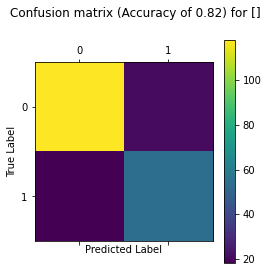

In [467]:
draw_confusion_matrix(Y_test, modelFinalKn.predict(X_test), '')

# Méthode random forest

In [468]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [469]:
#Réalisons la même méthode mais avec un classifieur différent: Le randomForest
modelRd = RandomForestClassifier()

In [470]:
print("Précision sans hyperparamètres: ",cross_val_score(RandomForestClassifier(), X_train, Y_train, cv=5, scoring='accuracy').mean())

Précision sans hyperparamètres:  0.8790504367427443


In [471]:
#liste des paramètres à appliquer à notre gridSearch
param_gridRd = {  "n_estimators"         : [ 10, 100, 200 ], 
                    "min_samples_leaf"     : [  3,   1,   7 ],
                    "criterion"            : ["gini"],#["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "warm_start"           : [False]           }

In [472]:
gridRd = GridSearchCV(RandomForestClassifier(), param_gridRd, cv = 5)

In [473]:
start_time = timeit.default_timer()
gridRd.fit(X_train, Y_train)
elapsed = timeit.default_timer() - start_time
print("temps d'entrainement du modèle: ",elapsed)

temps d'entrainement du modèle:  11.349584999999934


In [474]:
print("Meilleure précision obtenue en modifiant les hyperparamètres: ",gridRd.best_score_)

Meilleure précision obtenue en modifiant les hyperparamètres:  0.8790574809805578


In [475]:
print("Liste des hyperparamètres pour obtenir cette précision: ",gridRd.best_params_)

Liste des hyperparamètres pour obtenir cette précision:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'n_jobs': -1, 'warm_start': False}


In [476]:
#On stock notre modèle final pour le tester sur nos valeurs de test
modelFinalRd = gridRd.best_estimator_
print("précision du modèle avec nos valeurs de test: ",modelFinalRd.score(X_test, Y_test))

précision du modèle avec nos valeurs de test:  0.8388625592417062


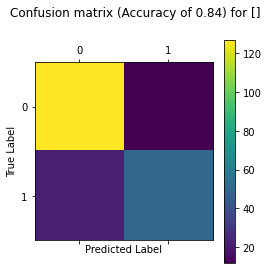

In [477]:
draw_confusion_matrix(Y_test, modelFinalRd.predict(X_test), "")

# Conclusion



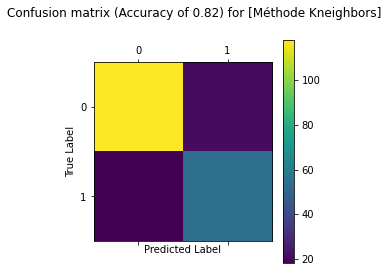

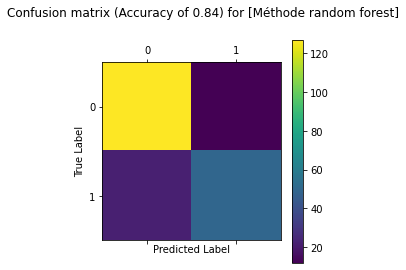

In [478]:
draw_confusion_matrix(Y_test, modelFinalKn.predict(X_test), "Méthode Kneighbors")
draw_confusion_matrix(Y_test, modelFinalRd.predict(X_test), "Méthode random forest")

In [479]:
print("methode Kneighbors (precision): ",modelFinalKn.score(X_test, Y_test))
print("methode Random forest (precision): ",modelFinalRd.score(X_test, Y_test))


methode Kneighbors (precision):  0.8151658767772512
methode Random forest (precision):  0.8388625592417062


### La méthode des random forest  plus précise que la méthode des Kneighbors mais de très peu
### Cela n'était pas le cas avant un préprocessing.
### Pour notre modèle final nous choisirons donc d'utiliser la méthode random forest

In [482]:
modelFinal = modelFinalRd

In [483]:
modelFinal.score(X_test, Y_test)

0.8388625592417062

# Serialization

In [484]:
import pickle

In [485]:
filename = "modelFinal.pkl"
with open(filename, 'wb') as f:
    pickle.dump(modelFinal, f)